In [31]:
from bs4 import BeautifulSoup as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import os
import pandas as pd
import pandas_datareader as web
from pandas_datareader import data as pdr
import pickle
import requests
import yfinance as yf
import numpy as np

In [17]:
yf.pdr_override
style.use('ggplot')
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs(resp.text, 'lxml')
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]: #everything after row 1
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)
        
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
        
    #print(tickers)
        
    return tickers

In [18]:
save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'T',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

In [7]:
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else: 
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2005,1,1)
    end = dt.datetime.now()
    
    for ticker in tickers:  #remove 25 and change to whichever number you want
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
          #  try:
                df = pdr.get_data_yahoo(ticker, start, end)
                df.reset_index(inplace=True)
                df.set_index("Date", inplace=True)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
          #  except Exception as ex:
           #     print('Error:', ex)
        else:
            print('Already have {}'.format(ticker))
        


In [19]:
get_data_from_yahoo()

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have T
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ARNC
Already have ANET
Already have AJG
Already have AIZ
Already have AT

In [20]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace = True)
        
        df.rename(columns = {'Adj Close': ticker}, inplace = True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
            
        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

In [21]:
compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM        ABT  ABBV   ABMD        ACN      ATVI       ADBE  \
Date                                                                            
2005-01-03  55.372093  11.840737   NaN  15.01  19.824249  4.980191  30.838949   
2005-01-04  54.921860  11.721498   NaN  14.98  19.358147  4.850803  30.024111   
2005-01-05  54.249859  11.587029   NaN  14.69  19.282974  4.921839  29.859142   
2005-01-06  54.740402  11.848348   NaN  14.52  19.110065  4.853340  29.364239   
2005-01-07  55.304882  12.051314   NaN  14.29  20.004671  4.690970  29.384233   

                  AMD        AAP        AES  ...       WYNN       XEL  \
Date                                         ...                        
2005-01-03  21.410000  27.539322  10.683968  ...  36.172787  9.800649   
2005-01-04  20.20999

In [48]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
   # df['AAPL'].plot()
    df_corr = df.corr()
    
    print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) +0.5, minor = False)  #marking ticks
    ax.set_yticks(np.arange(data.shape[1]) +0.5, minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.876507  0.885650  0.840399  0.921367  0.930290  0.817526   
ABT   0.876507  1.000000  0.798970  0.842155  0.980179  0.867629  0.951817   
ABBV  0.885650  0.798970  1.000000  0.860936  0.867691  0.907415  0.856474   
ABMD  0.840399  0.842155  0.860936  1.000000  0.866127  0.905554  0.892558   
ACN   0.921367  0.980179  0.867691  0.866127  1.000000  0.922948  0.948403   

           AMD       AAP       AES  ...      WYNN       XEL       XRX  \
MMM   0.184688  0.855815  0.098689  ...  0.711689  0.903224  0.102050   
ABT   0.396461  0.810608  0.276370  ...  0.636101  0.974452  0.106424   
ABBV  0.680749  0.262551  0.510756  ...  0.188338  0.792407  0.426605   
ABMD  0.392679  0.658247  0.248849  ...  0.501065  0.820731  0.094772   
ACN   0.380915  0.826098  0.230651  ...  0.639231  0.987378  0.089791   

          XLNX       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.862608 

<IPython.core.display.Javascript object>


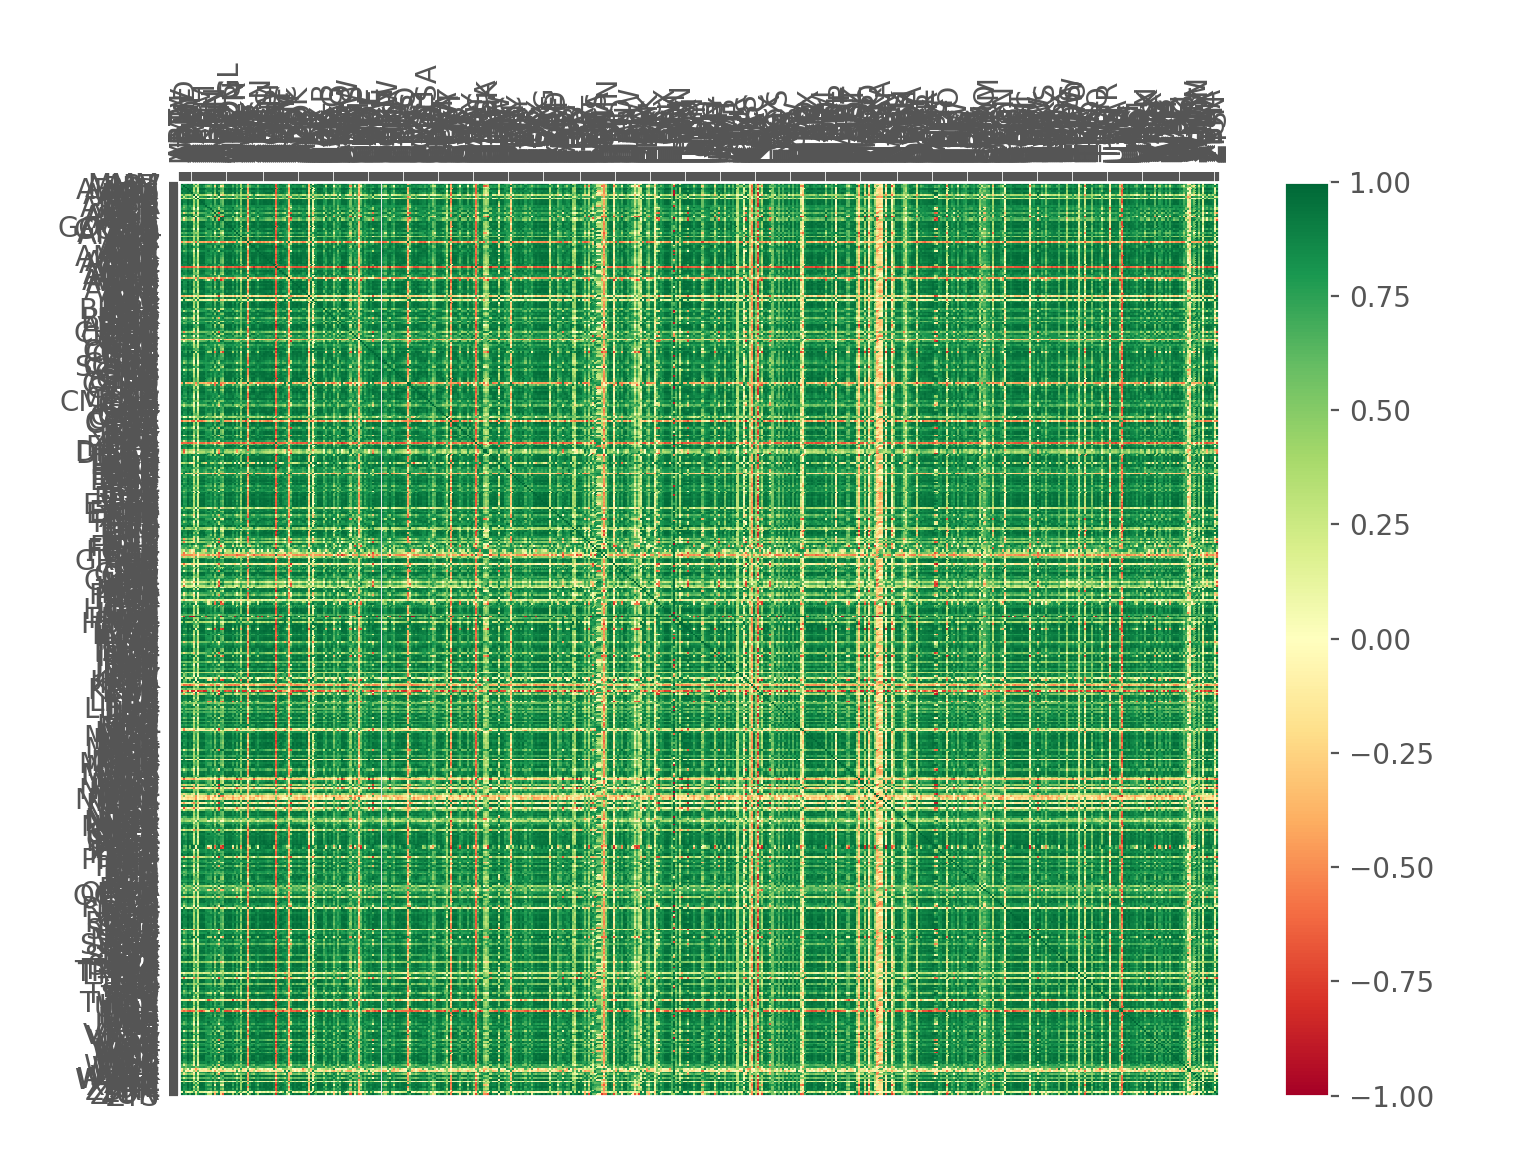

In [49]:
%matplotlib notebook  
visualize_data()